In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
PATH = '2017/Student-Feedback-Surveys-Superview.csv'

In [4]:
df = pd.read_csv(PATH)

## Rid our dataset of (3) invalid ratings

In [5]:
df = df[ df["Rating (Num)"] != '#ERROR!']
df = df[ df["Rating (Num)"] != '0']
df["Rating (Num)"] = df["Rating (Num)"].astype(int)

In [6]:
df["Rating (Num)"].unique()

array([ 3,  4,  5,  6,  7,  8,  9, 10,  1,  2])

# How many more promoters are there than detractors across our 2017 data?

In [8]:
def count_promoters(df):
    return (df["Rating (Num)"] >= 9).sum()

num_of_promoters = count_promoters(df)
num_of_promoters

760

In [9]:
def count_passives(df):
    return (df["Rating (Num)"] >= 7).sum() - count_promoters(df)
num_of_passives = count_passives(df)
num_of_passives

569

In [10]:
def count_detractors(df):
    return (df["Rating (Num)"] <= 6).sum()
num_of_detractors = count_detractors(df)
num_of_detractors

119

In [11]:
total = num_of_detractors + num_of_passives + num_of_promoters
actual_total = len(df)
actual_total == total

True

In [12]:
def calculate_nps(promoters, passives, detractors):
     return (promoters - detractors) / (promoters + passives + detractors)

In [13]:
calculate_nps(num_of_promoters, num_of_passives, num_of_detractors) * 100

44.267955801104975

(array([  2.,   2.,   8.,  13.,  35.,  59., 177., 392., 384., 376.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

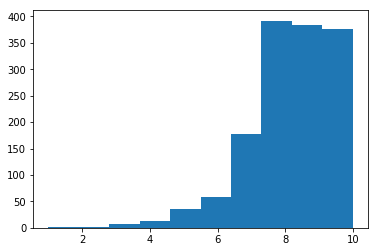

In [14]:
plt.hist(df["Rating (Num)"])

In [15]:
def week_str_to_int(week):
    return int(week[-1])

week_arr = [week_str_to_int(week) for week in df['Week']]
df['Week'] = week_arr


# Which track boasts the best promoter-to-detractor ratio?

In [16]:
tracks = df['Track'].dropna().unique()
track_promoter_detractor_ratio = {}
for track in tracks:
    temp_df = df[df['Track'] == track]
    track_promoter_detractor_ratio[track] = count_promoters(temp_df) / (count_detractors(temp_df) + count_promoters(temp_df))
track_promoter_detractor_ratio

{'Apps, Explorer': 0.7913043478260869,
 'Apps': 0.8504854368932039,
 'Games': 0.9366197183098591,
 'VR': 0.9583333333333334,
 'Games, Explorer': 1.0}